## Sources

* [NPR, December 13th [1]](https://www.npr.org/2018/12/13/676300525/almost-15-000-migrant-children-now-held-at-nearly-full-shelters)
* [SF Chronicle, November 9th, [2]](https://www.sfchronicle.com/nation/article/More-than-14-000-immigrant-children-are-in-U-S-13399510.php)
* [Washington Post, August 30th, [3]](https://www.washingtonpost.com/local/immigration/still-separated-nearly-500-separated-migrant-children-remain-in-us-custody/2018/08/30/6dbd8278-aa09-11e8-8a0c-70b618c98d3c_story.html?utm_term=.db8790abe02a)
* [CNN, December 10th, [4]](https://www.cnn.com/2018/12/10/politics/ice-potential-sponsors-arrests/index.html)
* [CNN, September 14th, [5]](https://www.cnn.com/2018/09/14/politics/immigrant-children-kept-detention/index.html)
* [WSJ, October 19th, [6]](https://www.wsj.com/articles/immigrant-children-are-staying-longer-in-government-custody-1539941401)
* [Washington Post, May 29th, [7]](https://www.washingtonpost.com/world/national-security/trumps-zero-tolerance-at-the-border-is-causing-child-shelters-to-fill-up-fast/2018/05/29/7aab0ae4-636b-11e8-a69c-b944de66d9e7_story.html?utm_term=.831c55ba33e5)
* [Guardian, September 21st, [8]](https://www.theguardian.com/us-news/2018/sep/21/ice-arrests-undocumented-immigrants-sponsoring-migrant-children)
* [MoveOn, June 30th, [9]](https://act.moveon.org/event/families-belong-together_attend1/search/)

## Plots

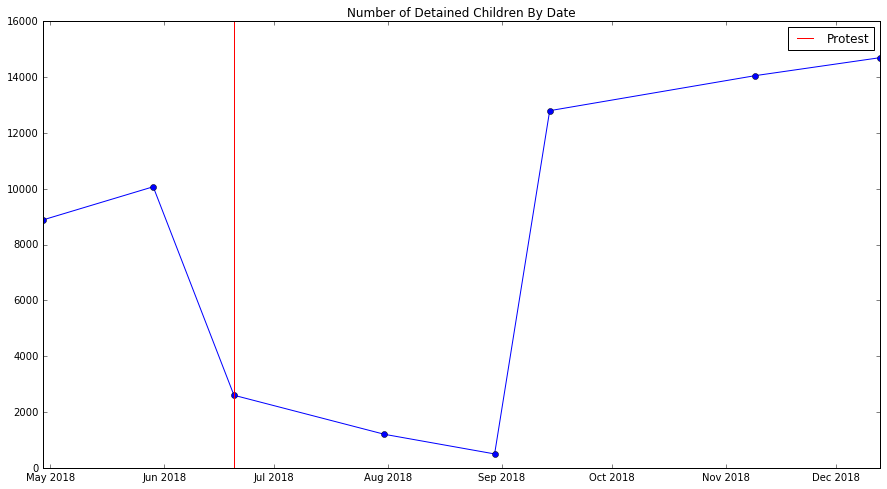

In [5]:
time_evolution(df, 'Detained', 'Number of Detained Children By Date')

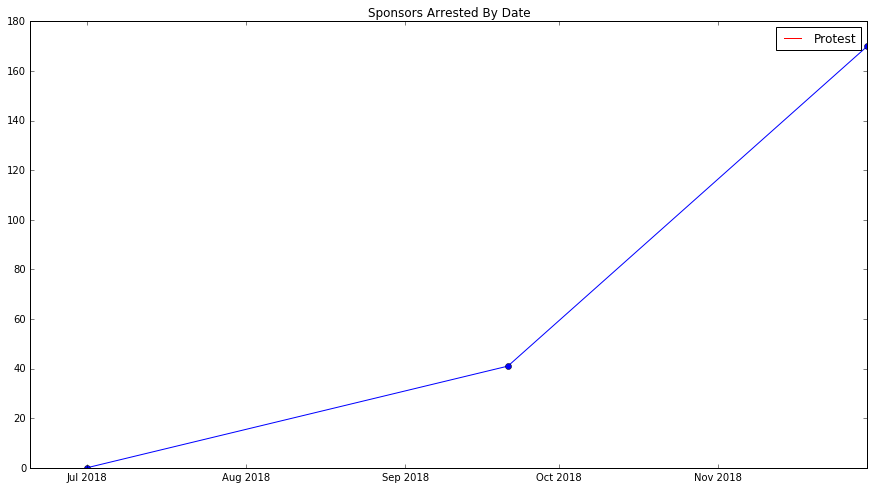

In [6]:
time_evolution(df, 'Sponsors Arrested', 'Sponsors Arrested By Date')

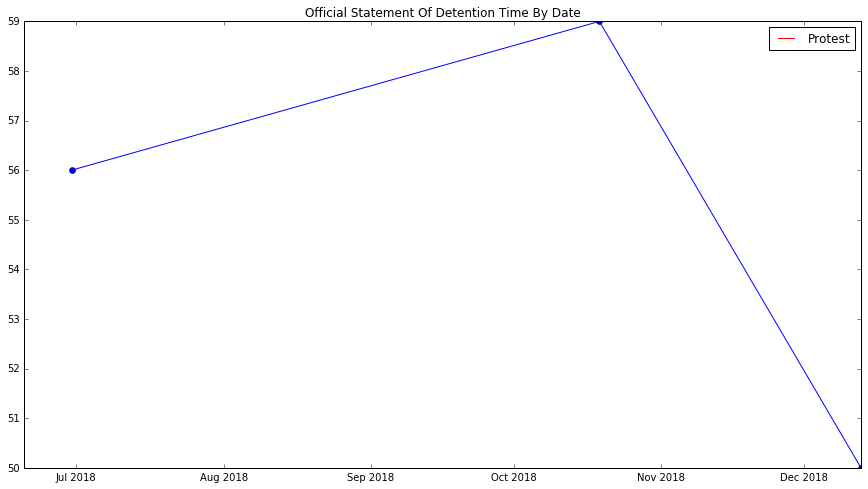

In [7]:
time_evolution(df, 'Detention Time Official (days)', 'Official Statement Of Detention Time By Date')

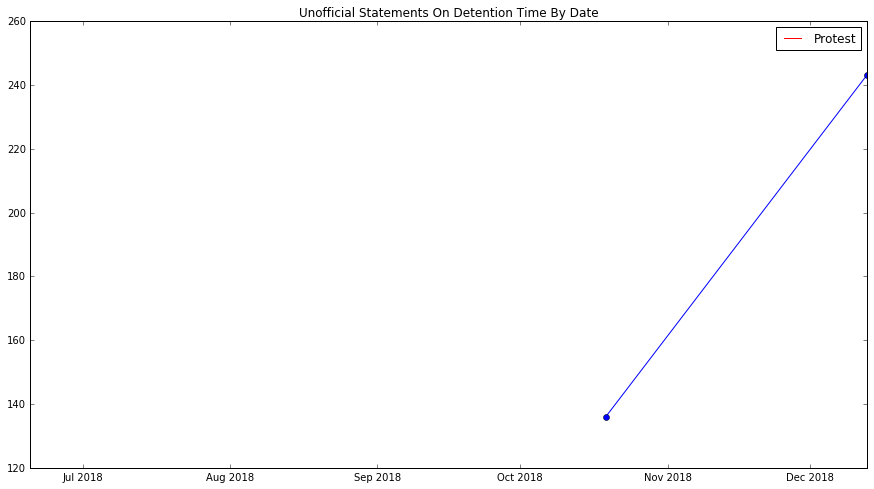

In [8]:
time_evolution(df, 'Detention Time Unofficial (days)', 'Unofficial Statements On Detention Time By Date')

## Raw Data

In [4]:
df

,Link,Date,Detained,Detention Time Official (days),Detention Time Unofficial (days),Sponsors Arrested,Accumulated Cost ($million),Protest
0,1,2018-12-13,14700.0,50.0,243.334,NaN,NaN,False
1,2,2018-11-09,14056.0,NaN,NaN,NaN,80.0,False
2,3,2018-08-30,497.0,NaN,NaN,NaN,NaN,False
3,3,2018-07-31,1200.0,NaN,NaN,NaN,NaN,False
4,3,2018-06-20,2600.0,NaN,NaN,NaN,NaN,False
5,4,2018-07-01,NaN,NaN,NaN,0.0,NaN,False
6,4,2018-11-30,NaN,NaN,NaN,170.0,NaN,False
7,5,2018-09-14,12800.0,NaN,NaN,NaN,NaN,False
8,6,2018-10-19,NaN,59.0,136.000,NaN,NaN,False
9,6,2018-06-30,NaN,56.0,NaN,NaN,NaN,False


## Code

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
import collections

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def make_row(link, date, detained=None, detention_time_official=None, detention_time_unofficial=None,
             sponsors_arrested=None, cost=None, protest=False):
    row_data = collections.OrderedDict()
    row_data['Link'] = link
    row_data['Date'] = date
    row_data['Detained'] = detained
    row_data['Detention Time Official (days)'] = detention_time_official
    row_data['Detention Time Unofficial (days)'] = detention_time_unofficial
    row_data['Sponsors Arrested'] = sponsors_arrested
    row_data['Accumulated Cost ($million)'] = cost
    row_data['Protest'] = protest
    return row_data

data = [
    make_row(
        1,
        datetime.date(2018, 12, 13),
        detained=14700,
        detention_time_official=50,
        detention_time_unofficial=243.334
    ),
    make_row(
        2,
        datetime.date(2018, 11, 9),
        detained=14056,
        cost=80
    ),
    make_row(
        3,
        datetime.date(2018, 8, 30),
        detained=497
    ),
    make_row(
        3,
        datetime.date(2018, 7, 31),
        detained=1200
    ),
    make_row(
        3,
        datetime.date(2018, 6, 20),
        detained=2600
    ),
    make_row(
        4,
        datetime.date(2018, 7, 1),
        sponsors_arrested=0
    ),
    make_row(
        4,
        datetime.date(2018, 11, 30),
        sponsors_arrested=170
    ),
    make_row(
        5,
        datetime.date(2018, 9, 14),
        detained=12800
    ),
    make_row(
        6,
        datetime.date(2018, 10, 19),
        detention_time_official=59,
        detention_time_unofficial=136
    ),
    make_row(
        6,
        datetime.date(2018, 6, 30),
        detention_time_official=56
    ),
    make_row(
        7,
        datetime.date(2018, 5, 29),
        detained=10073
    ),
    make_row(
        7,
        datetime.date(2018, 4, 29),
        detained=8886
    ),
    make_row(
        8,
        datetime.date(2018, 9, 21),
        sponsors_arrested=41
    ),
    make_row(
        9,
        datetime.date(2018, 6, 20),
        protest=True
    )
]
df = pd.DataFrame(data=data)
df.sort_values(by='Date');

In [3]:
def time_evolution(df, y_column, title):
    ys_mask = np.isfinite(df[y_column].values)
    ys = df[y_column].values[ys_mask]
    xs = df.Date.values[ys_mask]
    
    xs, ys = zip( *sorted( zip(xs, ys) ) )
    
    plt.xlim = (
        min(
            df.Date.unique() - datetime.timedelta(days=5)
        ),
        max(
            df.Date.unique() + datetime.timedelta(days=5)
        )
    )
    plt.ylim = (
        0.0,
        max(
            ys
        )
    )
    
    plt.plot(
        xs,
        ys,
        marker='o'
    )
    plt.title(title)
    plt.axvline(
        x=df.Date[df.Protest == True].values,
        color='red',
        label='Protest'
    )
    plt.legend()